In [ ]:
 # R I T E S H  KUMAR
 import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


In [ ]:
!pip install kaggle

In [ ]:
kag_cred = json.load(open("kaggle.json"))

In [ ]:
os.environ['KAGGLE_USERNAME']=kag_cred['username']
os.environ['KAGGLE_KEY']=kag_cred['key']

In [ ]:
!!kaggle datasets download -d abdallahalidev/plantvillage-dataset

['Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset',
 'License(s): CC-BY-NC-SA-4.0',
 'Downloading plantvillage-dataset.zip to /content',
 '',
 '  0% 0.00/2.04G [00:00<?, ?B/s]',
 '  0% 1.00M/2.04G [00:00<33:25, 1.09MB/s]',
 '  0% 2.00M/2.04G [00:01<17:12, 2.12MB/s]',
 '  0% 4.00M/2.04G [00:01<08:10, 4.45MB/s]',
 '  0% 7.00M/2.04G [00:01<04:20, 8.39MB/s]',
 '  0% 10.0M/2.04G [00:01<03:03, 11.9MB/s]',
 '  1% 13.0M/2.04G [00:01<02:28, 14.7MB/s]',
 '  1% 16.0M/2.04G [00:01<02:05, 17.3MB/s]',
 '  1% 19.0M/2.04G [00:01<01:50, 19.7MB/s]',
 '  1% 22.0M/2.04G [00:02<01:43, 20.9MB/s]',
 '  1% 25.0M/2.04G [00:02<01:39, 21.8MB/s]',
 '  1% 28.0M/2.04G [00:02<01:38, 22.0MB/s]',
 '  1% 31.0M/2.04G [00:02<01:35, 22.7MB/s]',
 '  2% 34.0M/2.04G [00:02<01:34, 22.8MB/s]',
 '  2% 37.0M/2.04G [00:02<01:36, 22.3MB/s]',
 '  2% 41.0M/2.04G [00:02<01:31, 23.5MB/s]',
 '  2% 45.0M/2.04G [00:03<01:28, 24.3MB/s]',
 '  2% 48.0M/2.04G [00:03<01:31, 23.4MB/s]',
 '  2% 52.0M/2.04G [00:0

In [ ]:
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
!ls


 kaggle.json  'plantvillage dataset'   plantvillage-dataset.zip   sample_data


In [ ]:
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['color', 'segmented', 'grayscale']
38
['Grape___Esca_(Black_Measles)', 'Tomato___Leaf_Mold', 'Peach___healthy', 'Raspberry___healthy', 'Tomato___Late_blight']
38
['Grape___Esca_(Black_Measles)', 'Tomato___Leaf_Mold', 'Peach___healthy', 'Raspberry___healthy', 'Tomato___Late_blight']
38
['Grape___Esca_(Black_Measles)', 'Tomato___Leaf_Mold', 'Peach___healthy', 'Raspberry___healthy', 'Tomato___Late_blight']


In [ ]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['1abe34b9-186b-4a90-a3a3-855005ff50f5___Mt.N.V_HL 9033.JPG', 'b80580f7-8e3e-4a81-ae32-df854d6ae3a8___Mt.N.V_HL 8978.JPG', 'dc94bb19-48ca-47d7-87ad-98cf5ec46aad___Mt.N.V_HL 6181.JPG', '03492a0d-6ad7-42ec-a742-c2f1fa59499a___Mt.N.V_HL 6035.JPG', 'eb3c315d-2ec9-4923-a602-9bce8c2db303___Mt.N.V_HL 6188.JPG']


(256, 256, 3)


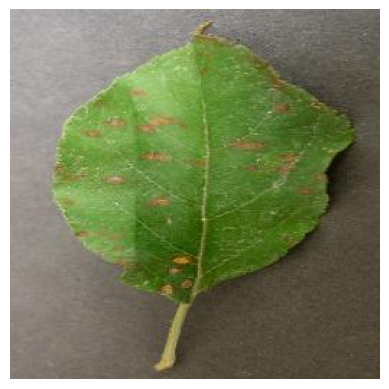

In [ ]:
base_dir = 'plantvillage dataset/color'


image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'


img = mpimg.imread(image_path)
print(img.shape)

plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)


In [ ]:
img_size = 224
batch_size = 32

In [ ]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [ ]:
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [ ]:
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 101s 70ms/step - accuracy: 0.6045 - loss: 1.6232 - val_accuracy: 0.8603 - val_loss: 0.4281
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 140s 103ms/step - accuracy: 0.9203 - loss: 0.2535 - val_accuracy: 0.8559 - val_loss: 0.4656
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 89s 64ms/step - accuracy: 0.9636 - loss: 0.1117 - val_accuracy: 0.8807 - val_loss: 0.4382
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 88s 64ms/step - accuracy: 0.9788 - loss: 0.0679 - val_accuracy: 0.8806 - val_loss: 0.5039
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 88s 65ms/step - accuracy: 0.9836 - loss: 0.0494 - val_accuracy: 0.8591 - val_loss: 0.7001


In [ ]:
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 16s 47ms/step - accuracy: 0.8542 - loss: 0.7173
Validation Accuracy: 85.91%


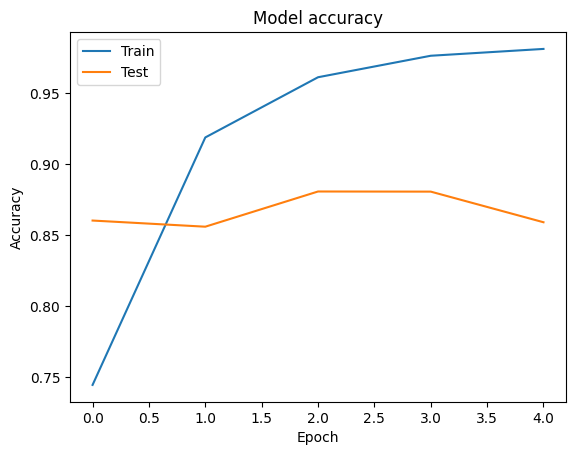

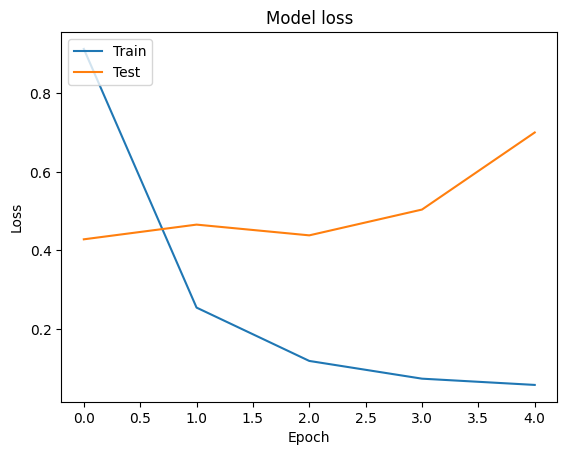

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):

    img = Image.open(image_path)

    img = img.resize(target_size)

    img_array = np.array(img)

    img_array = np.expand_dims(img_array, axis=0)

    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [ ]:
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [ ]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:
json.dump(class_indices, open('class_indices.json', 'w'))

In [ ]:
image_path = '/content/test_apple_black_rot.JPG'

predicted_class_name = predict_image_class(model, image_path, class_indices)


print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 988ms/step
Predicted Class Name: Apple___Black_rot


In [ ]:
model.save("model.h5")


In [ ]:
from google.colab import files
files.download("model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>